In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D

from sklearn.metrics import classification_report

In [3]:
# Load the dataset
data = pd.read_csv('archives/Sentiment_Stock_data.csv')

# Display the first few rows of the dataset
print(data.head())

   ID  Sentiment                                           Sentence
0   0          0  According to Gran , the company has no plans t...
1   1          1  For the last quarter of 2010 , Componenta 's n...
2   2          1  In the third quarter of 2010 , net sales incre...
3   3          1  Operating profit rose to EUR 13.1 mn from EUR ...
4   4          1  Operating profit totalled EUR 21.1 mn , up fro...


In [7]:
# Separate features and labels
sentences = data['Sentence'].astype(str).values  # Ensure all elements are strings
labels = data['Sentiment'].values

# Tokenize the sentences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad the sequences
max_length = max([len(x) for x in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [12]:
# MLP model
# Define the MLP model
mlp_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the MLP model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.5285 - loss: 0.6881 - val_accuracy: 0.5398 - val_loss: 0.6763
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6098 - loss: 0.6344 - val_accuracy: 0.5312 - val_loss: 0.6936
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7261 - loss: 0.4944 - val_accuracy: 0.5280 - val_loss: 0.8908
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7893 - loss: 0.3917 - val_accuracy: 0.5326 - val_loss: 1.2483
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8365 - loss: 0.3155 - val_accuracy: 0.5232 - val_loss: 1.7764
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8790 - loss: 0.2445 - val_accuracy: 0.5280 - val_loss: 2.0892
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9105 - loss: 0.1924 - val_accuracy: 0.5254 - val_loss: 2.6003
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9317 - loss: 0

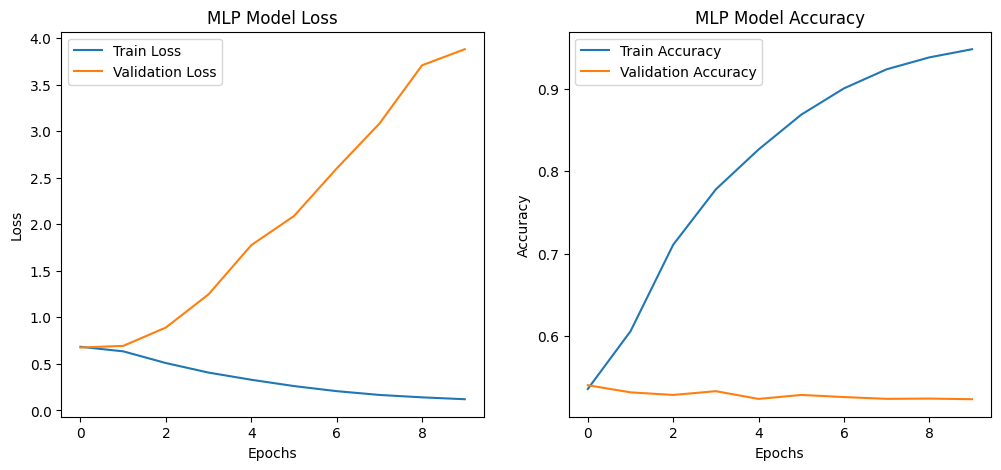

In [14]:
# Making graphs for the MLP model
# Plotting the loss and accuracy for MLP model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [13]:
# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(),
    Flatten(),  # Flatten the output before passing to Dense layers
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5274 - loss: 0.6888 - val_accuracy: 0.5424 - val_loss: 0.6788
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5724 - loss: 0.6582 - val_accuracy: 0.5345 - val_loss: 0.6807
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6644 - loss: 0.5806 - val_accuracy: 0.5351 - val_loss: 0.7305
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7682 - loss: 0.4402 - val_accuracy: 0.5333 - val_loss: 0.9215
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8435 - loss: 0.3099 - val_accuracy: 0.5288 - val_loss: 1.3337
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8935 - loss: 0.2181 - val_accuracy: 0.5296 - val_loss: 1.8506
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9233 - loss: 0.1655 - val_accuracy: 0.5304 - val_loss: 2.1151
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9383 - loss: 0

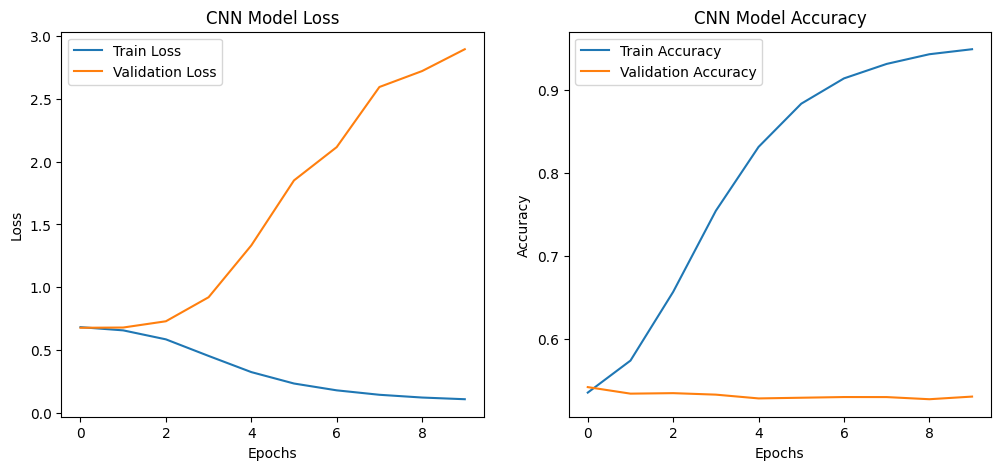

In [15]:
# Plotting the loss and accuracy for CNN model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# Evalute the MLP model 
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f'MLP Model Accuracy: {mlp_accuracy}')

# Evalute the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'CNN Model Accuracy: {cnn_accuracy}')

# Generate classification reports
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")

print("MLP Model Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print("CNN Model Classification Report:")
print(classification_report(y_test, y_pred_cnn))

680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.5230 - loss: 3.8088
MLP Model Accuracy: 0.5261827111244202
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5301 - loss: 3.0189
CNN Model Accuracy: 0.5317456722259521
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.51      0.51     10636
           1       0.54      0.54      0.54     11115

    accuracy                           0.53     21751
   macro avg       0.53      0.53      0.53     21751
weighted avg       0.53      0.53      0.53     21751

CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.51     10636
           1       0.54      0.57      0.55     11115

    accuracy                           0.53     21751
   macro avg       0.53      0.53      0.53     21751
weighted avg       0.